In [46]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
from pyarrow import table

import volpy_func_lib as vp
import load_clean_lib
import table_lib
import vol_strat_lib as vs
import option_returns as orpy
from volpy_func_lib import return_df

importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)

<module 'vol_strat_lib' from 'D:\\Professionelt\\Code\\volpy\\vol_strat_lib.py'>

In [60]:
om_folder = "VIX" #SPX_full, i2s1_full_v2', vix_markets_full
orpy_df, sum_df = vs.import_orpy_sum(om_folder = om_folder)

sum_df.loc[sum_df["SW_0_30"] <= 1e-6, "SW_0_30"] = 1e-6
orpy_df.loc[orpy_df["SW_0_30"] <= 1e-6, "SW_0_30"] = 1e-6

D:\Professionelt\Code\volpy\vol_strat_lib.py:31: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  orpy_df = pd.read_csv(f"{om_folder}/{time_type}df_orpy.csv")


In [62]:
importlib.reload(vp)
df = vp.make_df_strats(orpy_df, sgy_common = "r_D_30_", sign=False, scale = False, plot = False, ticker_list=None, extra_columns = ["SW_0_30", "#K"]) #, sgy_names = None

In [58]:
(df["VXD"]**2).min()

0.0007344099999999999

In [59]:
# Table
importlib.reload(table_lib)
results_df = table_lib.vix_table(df)
table_lib.latex_vix_table(results_df)

D:\Professionelt\Code\volpy\table_lib.py:516: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [43]:
# Latex code for Figures (appendix)
importlib.reload(table_lib)
table_lib.generate_latex_for_pairs(orpy_df[orpy_df["ticker"].isin(["TLT"]) == False])

In [44]:
importlib.reload(vp)
vp.plot_ticker_SW_vs_vix(df, "SPX", figsize=(12, 5), show_fig = False, save_fig = True, filename_suffix = "stretched")

In [45]:
# # VIX figures
importlib.reload(vp)
df = vp.make_df_strats(orpy_df, sgy_common = "r_D_30_", sign=False, scale = False, plot = False, ticker_list=None, extra_columns = ["SW_0_30"]) #, sgy_names = None

save_fig = True
show_fig = False

# Level
importlib.reload(vp)
for ticker in orpy_df["ticker"].unique():
    vp.plot_ticker_SW_vs_vix(df, ticker, figsize=(9, 5), show_fig = show_fig, save_fig = save_fig)

# Difference
importlib.reload(vp)
for ticker in orpy_df["ticker"].unique():
    vp.plot_ticker_SW_minus_vix(df, ticker, figsize=(9, 5), show_fig = show_fig, save_fig = save_fig)

# Scaled difference
importlib.reload(vp)
for ticker in orpy_df["ticker"].unique():
    vp.plot_ticker_SW_minus_vix_scaled(df, ticker, figsize=(9, 5), show_fig = show_fig, save_fig = save_fig)

In [9]:
df = df[df["VIX"].isna()==False]
df = df[df["ticker"] == "SPX"]
df = df[df["date"] < pd.Timestamp("2003-02-28")]
print(df["SW_0_30"].mean(), (df["VIX"]**2).mean())

0.058570366240341405 0.059671879482182624


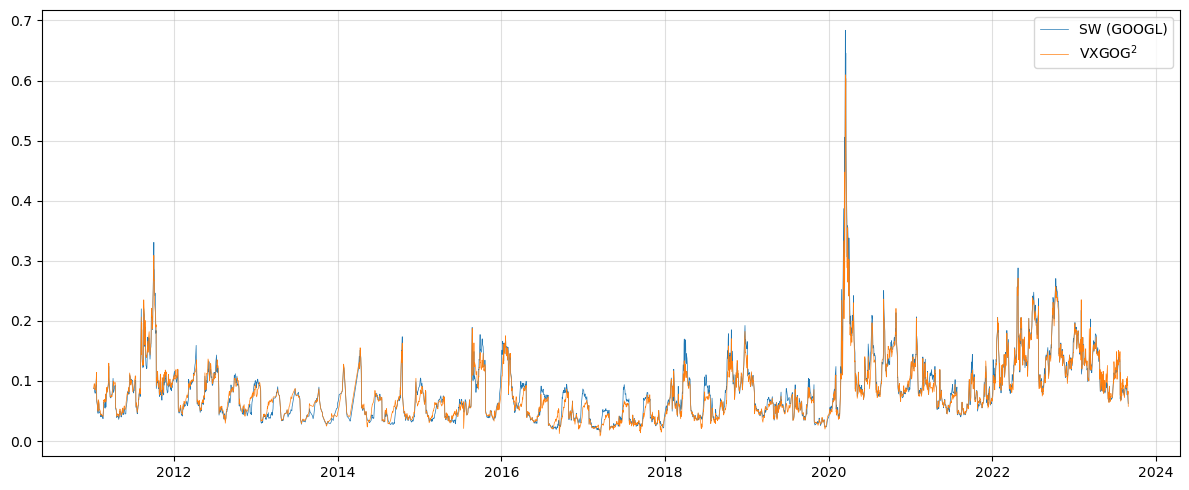

In [18]:
importlib.reload(vp)
vp.plot_ticker_SW_vs_vix(df, "GOOGL", figsize=(12, 5), show_fig = True, save_fig = False, filename_suffix = "stretched")

In [24]:
df_ = df[df["ticker"]=="GOOGL"].copy().reset_index(drop=True)
df_ = df_[df_["date"].dt.year >= 2014]
df_
# df = df[df["SW_0_30"] > 2]

,ticker,date,r_stock,r_D_30_straddle,r_D_30_strangle_15%,r_D_30_call_ATM,r_D_30_put_ATM,CF_30_SW_day,r_30_SW_day,SW_0_30,...,VXEWZ,VXEEM,VIXTLT,VXSLV,OVX,VXAPL,VXAZN,VXGOG,VXGS,VXIBM
2247,GOOGL,2014-01-02,-0.006772,-0.013205,0.019691,0.002922,-0.029431,0.001221,0.028960,0.065059,...,0.2619,0.2455,NaN,0.3188,0.2024,0.3035,0.3538,0.2211,0.2298,0.2057
2248,GOOGL,2014-01-03,-0.007295,-0.000140,NaN,0.022199,-0.022836,-0.000011,-0.000260,0.066374,...,0.2520,0.2421,NaN,0.3107,0.2060,0.3228,0.3558,0.2244,0.2186,0.2033
2249,GOOGL,2014-01-06,0.011149,0.018878,-0.004456,-0.000412,0.039167,0.006252,0.137904,0.072675,...,0.2590,0.2424,NaN,0.3128,0.2070,0.3149,0.3595,0.2347,0.2243,0.2062
2250,GOOGL,2014-01-07,0.019276,0.068700,0.259620,0.054933,0.082140,0.007179,0.152835,0.076989,...,0.2448,0.2301,NaN,0.3148,0.1967,0.3087,0.3429,0.2404,0.2155,0.2051
2251,GOOGL,2014-01-14,0.023527,0.056716,0.367217,0.064960,0.048914,0.006344,0.112926,0.079100,...,0.2414,0.2225,NaN,0.2905,0.1981,0.3080,0.3755,0.2732,0.2017,0.2238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,GOOGL,2023-08-25,0.000571,-0.087925,-0.211072,-0.427615,0.298772,-0.013150,-0.161115,0.076955,...,0.2921,0.1846,1.0264,NaN,0.2881,0.2282,0.2978,0.3041,0.2386,0.1570
4608,GOOGL,2023-08-28,0.008500,-0.218517,0.353922,-5.647646,5.337199,-0.001176,-0.014280,0.078881,...,0.2886,0.1779,1.0385,NaN,0.2866,0.2243,0.3198,0.3282,0.2337,0.1566
4609,GOOGL,2023-08-29,0.026974,-0.459576,13.367832,-18.164380,17.522588,-0.001673,-0.020321,0.072225,...,0.2822,0.1740,1.0005,NaN,0.2763,0.2195,0.2821,0.2786,0.2203,0.1476
4610,GOOGL,2023-08-30,0.009535,-0.286784,0.983564,-6.772051,6.336467,-0.008152,-0.098357,0.066306,...,0.2829,0.1688,0.9938,NaN,0.2663,0.2182,0.2755,0.2879,0.2176,0.1455
